# Day 1 Visualising Imagery

Install gdal and the dependency (if required):
```
conda install -c conda-forge gdal
conda install -c conda-forge libiconv
```
Useful tutorial to get started with gdalinfo and translate for sentinel-2 imagery: https://gdal.org/frmt_sentinel2.html

Robert Simmons on YouTube: https://www.youtube.com/watch?v=N_dmiQI1s24 also check out his Medium blogs

In [12]:
from pathlib import Path
import glob
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datapath = Path('../data/')#; datapath.exists()

1. Find the Sentinel-2 1C metadata for 10m resolution and corresponding crs
2. Convet the 10m JP2's into a multiband tif
3. Visualise

In [3]:
for i in datapath.rglob('*/*1C.xml'):
    meta_path = i

In [4]:
# ! gdalinfo {meta_path}
! gdalinfo SENTINEL2_L1C:{meta_path}:10m:EPSG_32738

Driver: SENTINEL2/Sentinel 2
Files: ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/MTD_MSIL1C.xml
       ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/GRANULE/L1C_T38KLV_A018893_20190203T071204/MTD_TL.xml
       ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B04.jp2
       ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B03.jp2
       ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B02.jp2
       ../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B08.jp2
Size is 10980, 10980
Coordinate System is:
PROJCS["WGS 84 / UTM zone 38S",
    GEOGC

In [ ]:
# ! gdal_translate -of GTiff {meta_path.parent}/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B04.jp2 {datapath}/B04.tif
# ! gdal_translate -of GTiff {meta_path.parent}/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B03.jp2 {datapath}/B03.tif
# ! gdal_translate -of GTiff {meta_path.parent}/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B02.jp2 {datapath}/B02.tif
# ! gdal_translate -of GTiff {meta_path.parent}/GRANULE/L1C_T38KLV_A018893_20190203T071204/IMG_DATA/T38KLV_20190203T071201_B08.jp2 {datapath}/B08.tif

In [ ]:
# ! gdal_merge.py -o {datapath}/madagascar.tif -separate {datapath}/*.tif -co PHOTOMETRIC=RGBA -co COMPRESS=DEFLATE

In [5]:
for i in datapath.glob('*'):
    print(i)

../data/B02.tif
../data/B04.tif
../data/S2A_MSIL2A_20190203T071201_N0211_R020_T38KLV_20190203T103815.zip
../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.SAFE
../data/S2A_MSIL1C_20190203T071201_N0207_R020_T38KLV_20190203T095553.zip
../data/B03.tif
../data/S2A_MSIL2A_20190203T071201_N0211_R020_T38KLV_20190203T103815.SAFE
../data/B08.tif
../data/aoi_madagascar.geojson
../data/madagascar.tif


In [6]:
image_file = datapath.joinpath('madagascar.tif')#; image_file.exists() 
image = rasterio.open(image_file)

In [9]:
print('Number of bands: ', image.count)
b, g, r, n = image.read()

Number of bands:  4


https://medium.com/analytics-vidhya/satellite-imagery-analysis-with-python-3f8ccf8a7c32

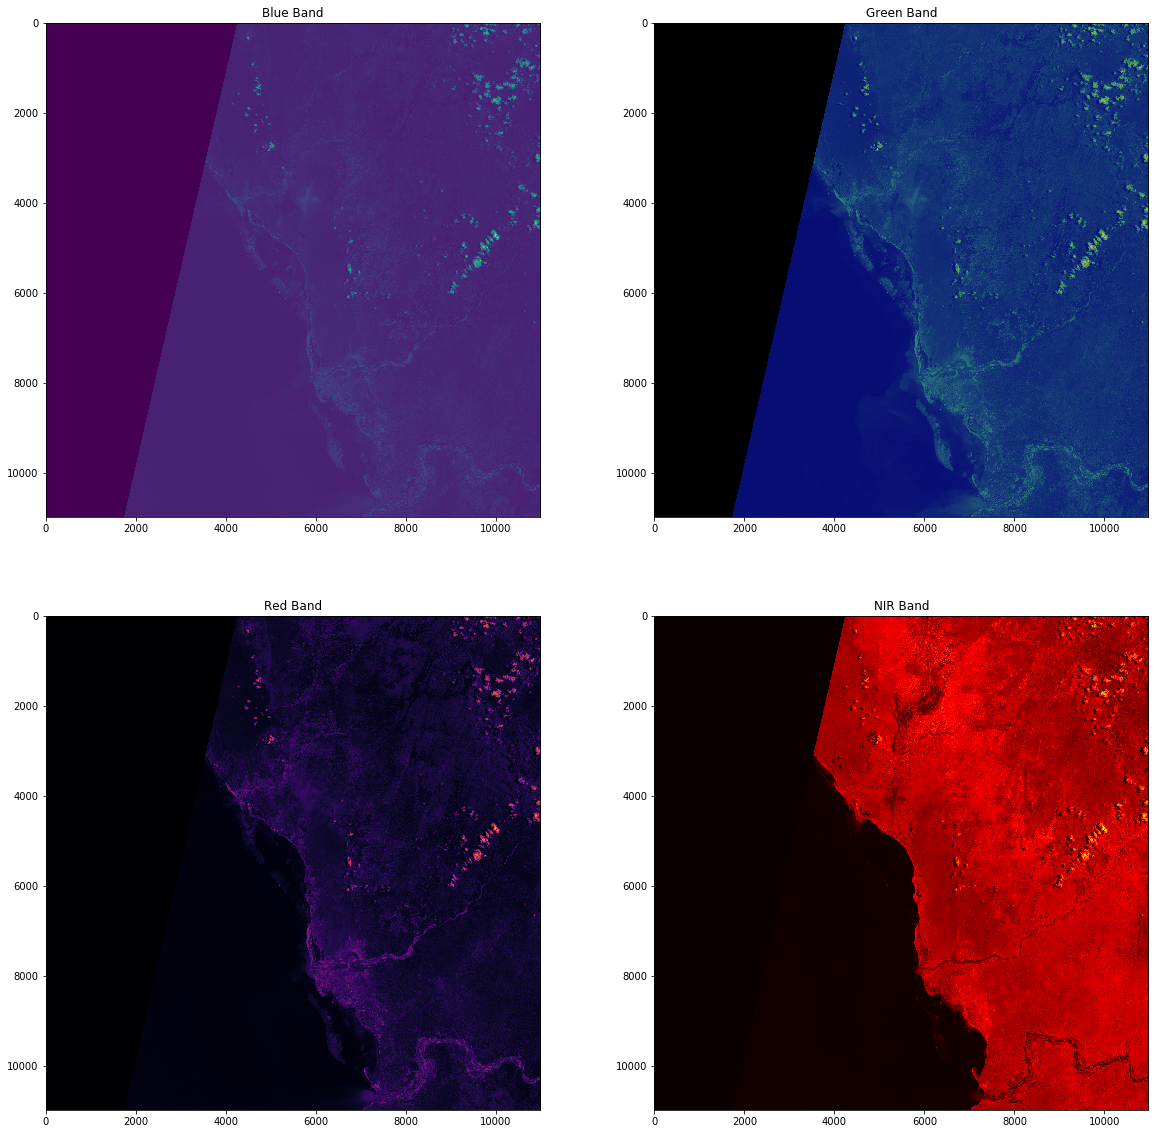

In [36]:
fig = plt.figure(figsize=(20,20))
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(b)
a.set_title('Blue Band')
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g, cmap='gist_earth')
a.set_title('Green Band')
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(r, cmap='inferno')
a.set_title('Red Band')
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(n, cmap='hot' )
a.set_title('NIR Band');